<a href="https://colab.research.google.com/github/Paul-Ajibola/Data-Science-Projects/blob/main/LAGOS%20HOUSE%20PRICES%20(EXPLORATORY%20DATA%20ANALYSES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# Importing the data
df1 = pd.read_csv("/content/drive/MyDrive/Portfolio Project 1 Data/rent_2[1].csv")
df2 = pd.read_csv("/content/drive/MyDrive/Portfolio Project 1 Data/sale_2[1].csv")

DATA CLEANING

In [148]:
df1.head()

,Unnamed: 0,Price,Pid,Property_name,Address,Neighboorhood
0,0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,Ajah
1,1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,Ikoyi
2,2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,Yaba
3,3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,Surulere
4,4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,Yaba


In [149]:
df2.head()

,Unnamed: 0,Price,Pid,Property_name,Address,Neighboorhood
0,0,2500000,E9857,Land for sale Eleranigbe Eleranigbe Ibeju-Lekk...,Eleranigbe Eleranigbe Eleranigbe Ibeju-Lekki L...,Ibeju-Lekki
1,1,30000000,"17,H2630",667.0 square meter Land for sale opebi street ...,Opebi street opebi street Opebi Ikeja Lagos,Ikeja
2,2,3500000000,"10,18,H4485",3 bedroom House for sale Victoria Island Exten...,VI Lagos VI Extension VI Lagos,VI
3,3,340000000,H4413,5 bedroom Duplex for sale Lekki Phase 1 Lekki ...,off afrika lane Lekki Phase 1 Lekki Lagos,Lekki
4,4,28000000,G8554,3 bedroom Flat / Apartment for sale Igando Iko...,NEAR IGANDO B/STOP Igando Ikotun Igando Lagos,Igando


In [150]:
df = pd.concat([df1, df2])

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19637 entries, 0 to 9783
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19637 non-null  int64 
 1   Price          19637 non-null  int64 
 2   Pid            19637 non-null  object
 3   Property_name  19637 non-null  object
 4   Address        19637 non-null  object
 5   Neighboorhood  19637 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [152]:
df.columns.str.strip()

Index(['Unnamed: 0', 'Price', 'Pid', 'Property_name', 'Address',
       'Neighboorhood'],
      dtype='object')

In [166]:
# df5["Price"] = df5['Price'].str.replace(",", "")
# df5["Price"] = df5["Price"].str.replace("/ year", "")
# df5["Price"] = df5["Price"].str.replace("/ sqm", "")
# df5["Price"] = df5["Price"].str.replace("/ day", "")
# df5["Price"] = df5["Price"].str.replace("/ sqf", "")

# Better written as this:

# df5['Price'] = (df5['Price']
#                 .str.replace(",", "")
#                 .str.replace("/ year", "")
#                 .str.replace("/ sqm", "")
#                 .str.replace("/ day", "")
#                 .str.replace("/ sqf", ""))

# a regex (regular expression) can be used, so that it looks like this:
# The | symbol means "OR"
# patterns = ",|/ year|/ sqm|/ day|/ sqf"

# df5['Price'] = df5['Price'].str.replace(patterns, "", regex=True).str.strip()

# # Or even better, a loop can be used
# to_remove = [",", "/ year", "/ sqm", "/ day", "/ sqf"]

# for item in to_remove:
#     df['Price'] = df['Price'].str.replace(item, "")

In [154]:
df["Price"].astype(float)

,Price
0,400000.0
1,14000000.0
2,200000.0
3,800000.0
4,300000.0
...,...
9779,50000000.0
9780,45000000.0
9781,30000000.0
9782,450000000.0


In [155]:
# Standardize the Text Data so that words with different cases are not treated differently
df["Property_name"] = df["Property_name"].str.lower()
df["Property_name"] = df["Property_name"].str.strip()
df["Address"] = df["Address"].str.lower()
df["Address"] = df["Address"].str.strip()

In [156]:
df.head()

,Unnamed: 0,Price,Pid,Property_name,Address,Neighboorhood
0,0,400000,H1190,1 bedroom mini flat flat / apartment for rent ...,fidiso estate abijo ajah lagos,Ajah
1,1,14000000,G7398,3 bedroom flat / apartment for rent gerrard ge...,gerrard gerrard gerard road ikoyi lagos,Ikoyi
2,2,200000,H5843,1 bedroom mini flat flat / apartment for rent ...,obadia akoka yaba lagos,Yaba
3,3,800000,H1194,2 bedroom flat / apartment for rent iju ishaga...,surulere iju ishaga road gbaja surulere lagos,Surulere
4,4,300000,H5842,1 bedroom mini flat flat / apartment for rent ...,close to unilag abule oja yaba lagos,Yaba


In [157]:
# Standardize the Text Data
df["Property_name"] = df["Property_name"].str.lower()
df["Property_name"] = df["Property_name"].str.strip()
df["Address"] = df["Address"].str.lower()
df["Address"] = df["Address"].str.strip()

In [158]:
df.drop(columns="Unnamed: 0")

,Price,Pid,Property_name,Address,Neighboorhood
0,400000,H1190,1 bedroom mini flat flat / apartment for rent ...,fidiso estate abijo ajah lagos,Ajah
1,14000000,G7398,3 bedroom flat / apartment for rent gerrard ge...,gerrard gerrard gerard road ikoyi lagos,Ikoyi
2,200000,H5843,1 bedroom mini flat flat / apartment for rent ...,obadia akoka yaba lagos,Yaba
3,800000,H1194,2 bedroom flat / apartment for rent iju ishaga...,surulere iju ishaga road gbaja surulere lagos,Surulere
4,300000,H5842,1 bedroom mini flat flat / apartment for rent ...,close to unilag abule oja yaba lagos,Yaba
...,...,...,...,...,...
9779,50000000,E0725,5 bedroom duplex for sale magodo isheri ojodu ...,"gateway zone, magodo magodo isheri ojodu lagos",Ojo
9780,45000000,E0701,4 bedroom duplex for sale bakare estate agungi...,sassi street bakare estate agungi lekki lagos,Lekki
9781,30000000,E0721,5 bedroom duplex for sale ejigbo ejigbo lagos,idimu road ejigbo ejigbo lagos,Ejigbo
9782,450000000,E0719,1127.0 square meter land for sale adeola odeku...,idejo street adeola odeku vi lagos,VI


In [159]:
df["Neighboorhood"].nunique()

42

In [160]:
df["Price"].astype(float)

,Price
0,400000.0
1,14000000.0
2,200000.0
3,800000.0
4,300000.0
...,...
9779,50000000.0
9780,45000000.0
9781,30000000.0
9782,450000000.0


In [161]:
df.tail()

,Unnamed: 0,Price,Pid,Property_name,Address,Neighboorhood
9779,9779,50000000,E0725,5 bedroom duplex for sale magodo isheri ojodu ...,"gateway zone, magodo magodo isheri ojodu lagos",Ojo
9780,9780,45000000,E0701,4 bedroom duplex for sale bakare estate agungi...,sassi street bakare estate agungi lekki lagos,Lekki
9781,9781,30000000,E0721,5 bedroom duplex for sale ejigbo ejigbo lagos,idimu road ejigbo ejigbo lagos,Ejigbo
9782,9782,450000000,E0719,1127.0 square meter land for sale adeola odeku...,idejo street adeola odeku vi lagos,VI
9783,9783,2000000,E0717,land for sale free trade zone ibeju-lekki lagos,ibeju lekki free trade zone ibeju-lekki lagos,Ibeju-Lekki


EXPLORATORY DATA ANALYSIS (**Univariate Analysis**)

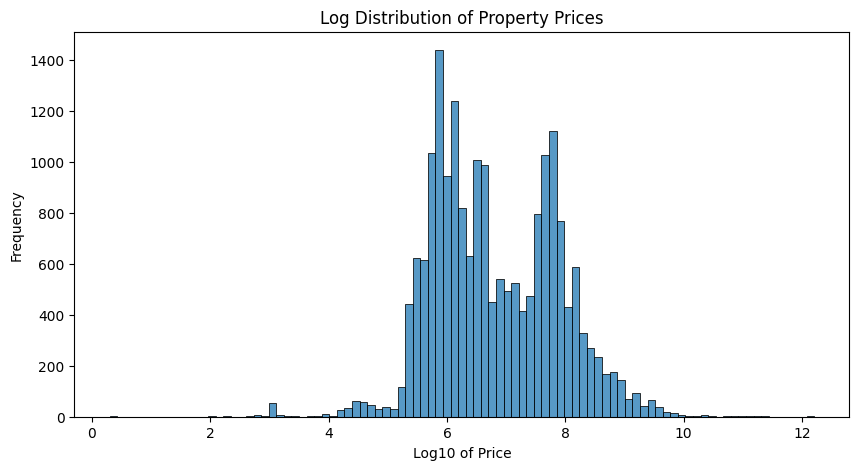

In [162]:
plt.figure(figsize=(10, 5))

sns.histplot(np.log10(df["Price"]))
plt.title("Log Distribution of Property Prices")
plt.xlabel("Log10 of Price")
plt.ylabel("Frequency")
plt.show()

The data shows two distinct peaks for the prices of properties in Lagos. The first major peak is near $10^6$ suggesting that a high volume of entry level listings in developing parts of the state. The second peak around $10^8$ represents the primary residential market for the middle-to-upper class, consisting of flats and terraces in developed areas. Finally, the outliers on the far right, that is, $10^{10}$ and $10^{12}$ represent extreme values or possible data errors reaching into trillions of naira.

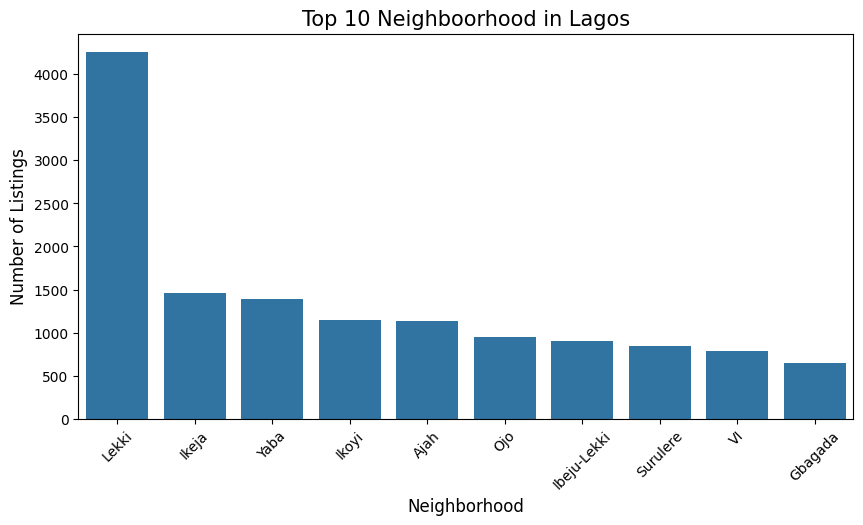

In [163]:
plt.figure(figsize=(10, 5))

top_neighborhood = df["Neighboorhood"].value_counts().head(10)

sns.barplot(x=top_neighborhood.index, y=top_neighborhood.values)
plt.title("Top 10 Neighboorhood in Lagos", fontsize=15)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45)
plt.show()

The bar chart shows the top ten neighborhoods in Lagos by property listing volume, providing a clear overview of the most active geographical sub-markets in the dataset. Lekki emerges as the dominant leader with over 4,000 listings, indicating it is the primary hub for real estate activity in this collection. Other significant hotspots include Ikeja, Yaba, and Ikoyi, showing a healthy mix of both Mainland and Island residential hubs. The y-axis represents the Frequency (Number of Listings), which confirms that our exploratory insights for these specific areas are based on a statistically significant sample sizes.

**Bivariate Analysis**

In [164]:
df["Neighboorhood"] = df["Neighboorhood"].astype(str)
df["Log_Price"] = np.log10(df["Price"])
top_10_list = df["Neighboorhood"].value_counts().head(10).index.tolist()
df_sub = df[df["Neighboorhood"].isin(top_10_list)]

/tmp/ipython-input-1193152258.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sub, x="Neighboorhood", y="Log_Price", palette="husl")


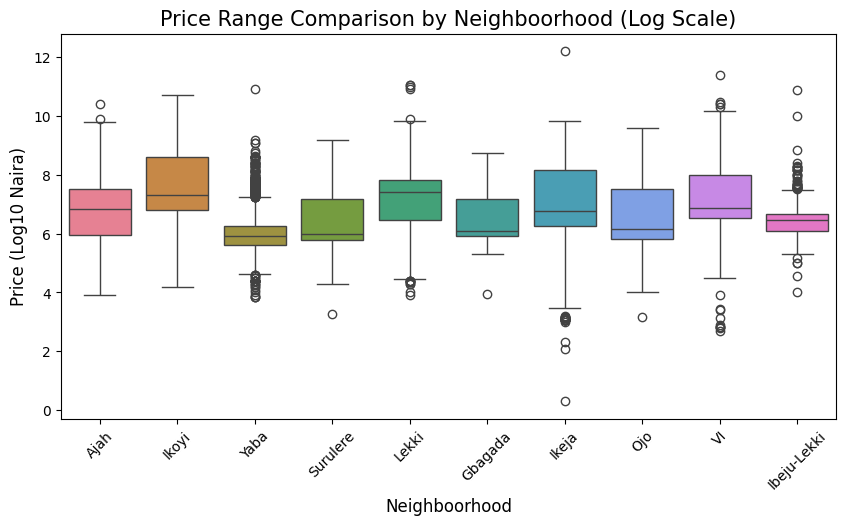

In [165]:
plt.figure(figsize=(10, 5))
top_neighborhood = df["Neighboorhood"].value_counts().head(10)
price = np.log10(df["Price"])

sns.boxplot(data=df_sub, x="Neighboorhood", y="Log_Price", palette="husl")

plt.title("Price Range Comparison by Neighboorhood (Log Scale)", fontsize=15)
plt.xlabel("Neighboorhood", fontsize=12)
plt.ylabel("Price (Log10 Naira)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

This box plot comparison reveals the top 5 locations within the Lagos real estate market by visualizing price distributions across the most active neighborhoods. By using the Log10 scale, we see that while areas like Ikoyi and VI have fewer total listings, they command a much higher median price floor compared to mainland hubs. The boxes also show the middle 50% of the market, showing that neighborhoods like Yaba and Ibeju-Lekki offer the most price stabililty and affordability for residential seekers. On the other hands, the extensive whiskers and outlier dots in areas like Lekki and Ikeja indicate a highly diverse market containing everything from mid-range apartments to ultra-luxury estates. Ultimately, this visualization proves that in Lagos, geographical location is the primary driver of price differences.

**GENERAL INSIGHTS FROM THE EXPLORATORY DATA ANALYSES**


This analysis focused on a dataset of approprixmately 19,000 property listings in Lagos. The initial data cleaning involved removing the "Unnamed: 0" index column and addressing data types to ensure that the "Neighborhood" column was treated as a categorical text. This presentation was essential to prevent errors during the visualization of price distributions across different areas.

Because the raw property prices spanned several orders of magnitude, a $log_{10}$ tranformation was applied to the price feature. The resulting histogram revealed a clear bimodal distribution, indicating that the Lagos market is split into two distinct segments. One peak represents the high-volume market, while the second peak represents a separate, high-value "luxury" tier.

Boxplot analysis was performed on the top 10 most frequent neighborhoods. This revealed a significant "Neighborhood Premium", with areas like Ikoyi and VI showing much higher median prices and wider price spreads than areas like Ajah or Yaba. These findings suggest that location is the key factor of the character of the market of real estate in Lagos.